Practical No 03

Convolutional neural network (CNN) (Any One from the following)
1. Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
fashion_train_df= pd.read_csv('mnist_train.csv')

In [6]:
fashion_test_df = pd.read_csv('mnist_test.csv')

In [7]:
fashion_train_df.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
1      0    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
2      4    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
3      1    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
4      9    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]

In [8]:
fashion_train_df.tail()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
1716      1    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
1717      1    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
1718      3    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
1719      7    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
1720      9    0    0    0    0    0    0    0    0    0  ...    NaN    NaN   

      28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
1716    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1717    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1718    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1719    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1720    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 785 columns]

In [9]:
fashion_train_df.shape

(1721, 785)

In [10]:
fashion_test_df.shape

(1155, 785)

In [11]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [12]:
training.shape

(1721, 785)

In [13]:
import random

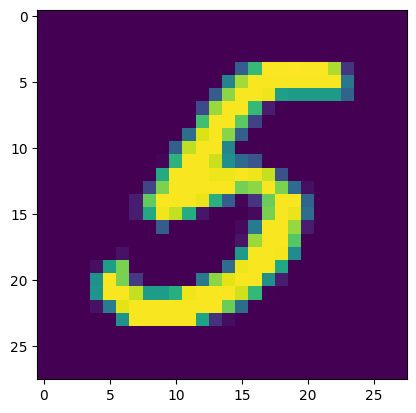

In [33]:
i = random.randint(0,1720)
plt.imshow(training[i,1:].reshape(28,28)) 
label = training[i,1]


In [34]:
W_grid = 7
L_grid = 7

fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))

axes = axes.ravel() 
n_training = len(training) 



for i in np.arange(0,W_grid*L_grid):
        index = np.random.randint(0,n_training)
        axes[i].imshow(training[index,1:].reshape((28,28)))
        axes[i].set_title(training[index,0],fontsize = 8)
        axes[i].axis('off')
        
plt.subplots_adjust(hspace=0.4)  

In [35]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345) 

In [37]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [19]:
X_train.shape


(1376, 28, 28, 1)

In [20]:
X_test.shape

(1155, 28, 28, 1)

In [21]:
X_validate.shape

(345, 28, 28, 1)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])


In [24]:
epochs = 200


In [25]:

cnn_model.fit(X_train,y_train,batch_size =512,epochs = epochs,verbose = 1,validation_data = (X_validate,y_validate) )

Epoch 1/200
3/3 [==============================] - 1s 151ms/step - loss: nan - accuracy: 0.0930 - val_loss: nan - val_accuracy: 0.0696
Epoch 2/200
3/3 [==============================] - 0s 43ms/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.0696
Epoch 3/200
3/3 [==============================] - 0s 43ms/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.0696
Epoch 4/200
3/3 [==============================] - 0s 40ms/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.0696
Epoch 5/200
3/3 [==============================] - 0s 37ms/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.0696
Epoch 6/200
3/3 [==============================] - 0s 39ms/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.0696
Epoch 7/200
3/3 [==============================] - 0s 42ms/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.0696
Epoch 8/200
3/3 [==============================] - 0s 50ms/st

In [26]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

37/37 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0823
Test Accuracy : 0.082


In [27]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=-1)


37/37 [==============================] - 0s 3ms/step


In [28]:
predicted_classes

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)  

In [30]:
from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.08      1.00      0.15        95
     Class 1       0.00      0.00      0.00       144
     Class 2       0.00      0.00      0.00       129
     Class 3       0.00      0.00      0.00       124
     Class 4       0.00      0.00      0.00       129
     Class 5       0.00      0.00      0.00       104
     Class 6       0.00      0.00      0.00        99
     Class 7       0.00      0.00      0.00       117
     Class 8       0.00      0.00      0.00       104
     Class 9       0.00      0.00      0.00       110

    accuracy                           0.08      1155
   macro avg       0.01      0.10      0.02      1155
weighted avg       0.01      0.08      0.01      1155



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
